In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)


## 导入数据，注意这里使用的时候请用vscode之类的文本编辑器用gb2312打开然后保存为utf-8格式

In [9]:
train_df = pd.read_csv('nCoV_100k_train.labled.csv',engine ='python')
test_df  = pd.read_csv('nCov_10k_test.csv',engine ='python')


# 观察训练和测试数据的前几行

In [14]:
train_df.head(5)

,微博id,微博发布时间,发布人账号,微博中文内容,微博图片,微博视频,情感倾向
0,4456072029125500,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456074167480980,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456054253264520,01月01日 22:39,小王爷学辩论o_O,�偳癯空饩褪俏业�，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456061509126470,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455979322528190,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1


In [16]:
test_df.head(5)

,微博id,微博发布时间,发布人账号,微博中文内容,微博图片,微博视频
0,4456068992182160,01月01日 23:38,-精緻的豬豬女戰士-,#你好2020#新年第一天元气满满的早起出门买早饭结果高估了自己抗冻能力回家成功冻发烧（大概...,['https://ww2.sinaimg.cn/thumb150/745aa591ly1g...,[]
1,4456424178427250,01月02日 23:09,liujunyi88,大宝又感冒鼻塞咳嗽了，还有发烧。队友加班几天不回。感觉自己的情绪在家已然是随时引爆的状态。情...,[],[]
2,4456797466940200,01月03日 23:53,ablsa,还要去输两天液，这天也太容易感冒发烧了，一定要多喝热水啊?,['https://ww3.sinaimg.cn/orj360/006fTidCly1gaj...,[]
3,4456791021108920,01月03日 23:27,喵吃鱼干Lynn,我太难了别人怎么发烧都没事就我一检查甲型流感?,[],[]
4,4457086404997440,01月04日 19:01,我的发小今年必脱单,果然是要病一场的喽回来第三天开始感冒今儿还发烧了喉咙眼睛都难受的一匹怎么样能不经意让我的毕设...,[],[]


## 我们能看到数据的字段包含微博id，微博发布时间，微博中文内容，微博图片，微博视频 和情感倾向(标签)

In [19]:
train_df.shape, test_df.shape

((100000, 7), (10000, 6))

## 100k条带标注的训练数据，10k测试数据

In [26]:
train_df[train_df['情感倾向']=='-']

,微博id,微博发布时间,发布人账号,微博中文内容,微博图片,微博视频,情感倾向
3520,4463901464693180,01月23日 14:21,福建日报,【#广东发现6起家庭聚集性疫情#】据广东省卫健委：1月22日0-24时，广东省报告新型冠状病...,['https://ww1.sinaimg.cn/orj360/c8a0fc08gy1gb6...,[],-


Text(0.5, 1.0, '情感倾向(target)')

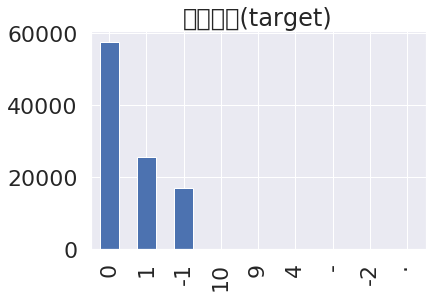

In [23]:
train_df['情感倾向'].value_counts().plot.bar()
plt.title('sentiment(target)')

In [29]:
train_df = train_df[train_df['情感倾向'].isin(['0','1','-1'])]

Text(0.5, 1.0, 'sentiment(target)')

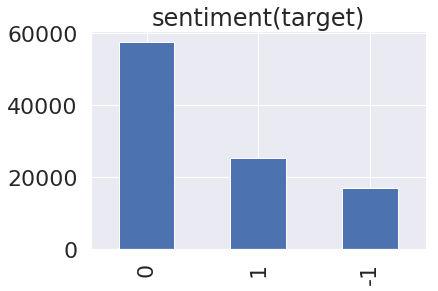

In [31]:
train_df['情感倾向'].value_counts().plot.bar()
plt.title('sentiment(target)')

## 我们观察一下舆情趋势与时间的关系，时间轴为2020年1-1日起的自然日

In [53]:
train_df['time'] = pd.to_datetime('2020年' + train_df['微博发布时间'], format='%Y年%m月%d日 %H:%M', errors='ignore')

In [74]:
train_df['month'] =  train_df['time'].dt.month
train_df['day'] =  train_df['time'].dt.day
train_df['dayfromzero']  = (train_df['month']-1)*31 +  train_df['day']

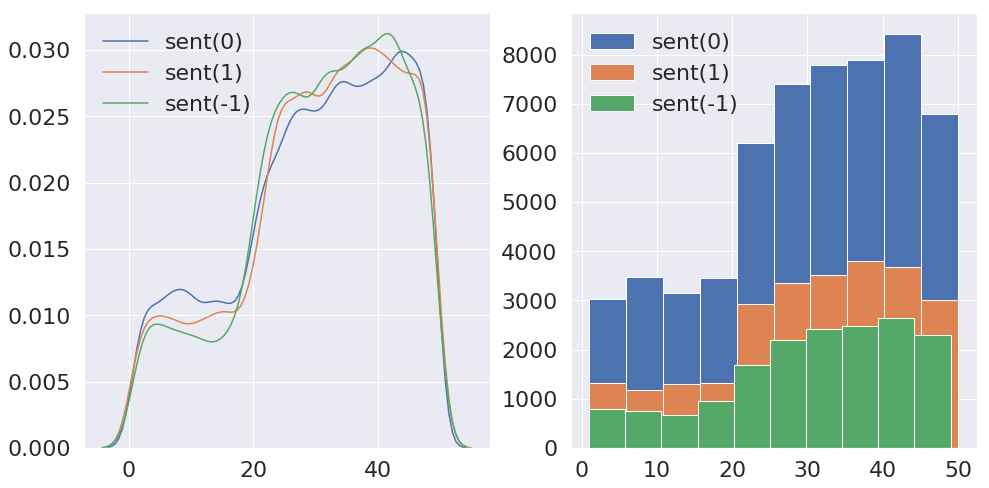

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(train_df.loc[train_df['情感倾向'] == '0', 'dayfromzero'], ax=ax[0], label='sent(0)')
sns.kdeplot(train_df.loc[train_df['情感倾向'] == '1', 'dayfromzero'], ax=ax[0], label='sent(1)')
sns.kdeplot(train_df.loc[train_df['情感倾向'] == '-1', 'dayfromzero'], ax=ax[0], label='sent(-1)')

train_df.loc[train_df['情感倾向'] == '0', 'dayfromzero'].hist(ax=ax[1])
train_df.loc[train_df['情感倾向'] == '1', 'dayfromzero'].hist(ax=ax[1])
train_df.loc[train_df['情感倾向'] == '-1', 'dayfromzero'].hist(ax=ax[1])

ax[1].legend(['sent(0)', 'sent(1)','sent(-1)'])

plt.show()

### 舆情在春节期间迅速升温，并在李文亮医生事件后达到巅峰(2-8日到2月10日)

# 重复发帖数量

In [78]:
train_df['微博id'].value_counts().head(10)

4466220575191380    2
4463683088077780    2
4470569351337640    2
4460684139742960    1
4465820153259820    1
4467582310655260    1
4466528042763680    1
4463287624283950    1
4473075678681240    1
4473036550285470    1
Name: 微博id, dtype: int64

In [80]:
train_df['weibo_len'] = train_df['微博中文内容'].astype(str).apply(len)

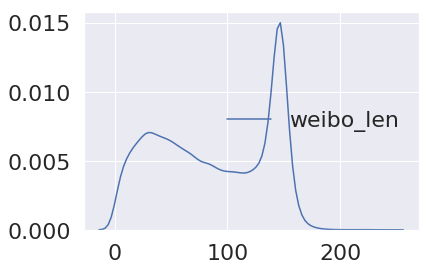

In [84]:
sns.kdeplot(train_df['weibo_len'])
#plt.title('weibo_len')

In [88]:
train_df['pic_len'] = train_df['微博图片'].apply(lambda x: len(eval(x)))

Text(0.5, 1.0, 'pic_len(target)')

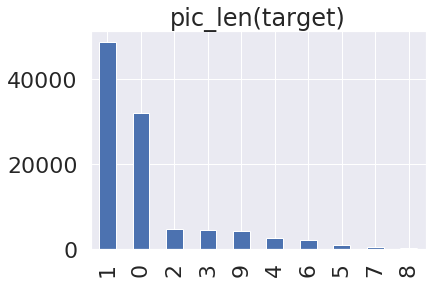

In [89]:
train_df['pic_len'].value_counts().plot.bar()
plt.title('pic_len(target)')

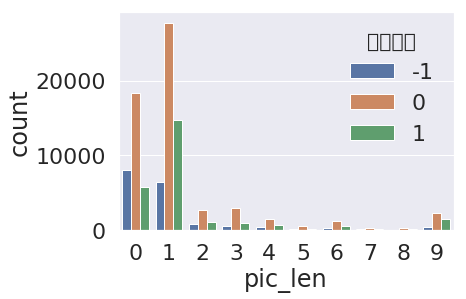

In [90]:
sns.countplot(x='pic_len', hue='情感倾向',data=train_df)
plt.show()